In [47]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [48]:
#import data
df = pd.read_csv('7_13_2022.csv') 
df.head()

,Unnamed: 0,Plot,Year,Date,Red,Green,Blue,BI,GLI,NGRDI,...,ExR,ExB,ExGR,MGRVI,RGBVI,GRRI,VEG,Range,Row,Mean.Yld.bu.ac
0,15440,1000,2022,7132022,71.464,105.74,65.630,82.855995,0.213401,0.193427,...,-0.023433,-0.057068,74.409433,0.372902,0.408967,1.479626,1.522187,5,8,234.613611
1,15441,1001,2022,7132022,72.271,104.99,64.322,82.428388,0.211750,0.184581,...,-0.015773,-0.061839,73.402773,0.356999,0.406743,1.452727,1.510202,5,9,235.301674
2,15442,1002,2022,7132022,74.699,105.55,67.089,84.106435,0.196414,0.171158,...,-0.003927,-0.047002,69.315927,0.332573,0.379471,1.413004,1.464476,5,10,235.322491
3,15443,1003,2022,7132022,68.715,100.25,59.210,78.054762,0.220979,0.186636,...,-0.017745,-0.076064,72.592745,0.360708,0.423655,1.458925,1.533075,5,11,214.629596
4,15444,1004,2022,7132022,73.796,106.11,65.831,83.743462,0.206320,0.179616,...,-0.011376,-0.056754,72.604376,0.348005,0.397165,1.437883,1.493623,5,12,239.331746


In [49]:
#create 16 datasets
red_mean_cols = df[['Red', 'Mean.Yld.bu.ac']]
green_mean_cols = df[['Green', 'Mean.Yld.bu.ac']]
blue_mean_cols = df[['Blue', 'Mean.Yld.bu.ac']]
bi_mean_cols = df[['BI', 'Mean.Yld.bu.ac']]
gli_mean_cols = df[['GLI', 'Mean.Yld.bu.ac']]
ngrdi_mean_cols = df[['NGRDI', 'Mean.Yld.bu.ac']]
vari_mean_cols = df[['VARI', 'Mean.Yld.bu.ac']]
bgi_mean_cols = df[['BGI', 'Mean.Yld.bu.ac']]
exg_mean_cols = df[['ExG', 'Mean.Yld.bu.ac']]
exr_mean_cols = df[['ExR', 'Mean.Yld.bu.ac']]
exb_mean_cols = df[['ExB', 'Mean.Yld.bu.ac']]
exgr_mean_cols = df[['ExGR', 'Mean.Yld.bu.ac']]
mgrvi_mean_cols = df[['MGRVI', 'Mean.Yld.bu.ac']]
rgbvi_mean_cols = df[['RGBVI', 'Mean.Yld.bu.ac']]
grri_mean_cols = df[['GRRI', 'Mean.Yld.bu.ac']]
veg_mean_cols = df[['VEG', 'Mean.Yld.bu.ac']]

In [50]:
X_red = red_mean_cols['Red'].values.reshape(-1, 1)
y_yld_mean = red_mean_cols['Mean.Yld.bu.ac']

reg_red = LinearRegression()
reg_red.fit(X_red, y_yld_mean)

LinearRegression()

In [51]:
r2_red = reg_red.score(X_red, y_yld_mean)
r2_red

0.009370690143522875

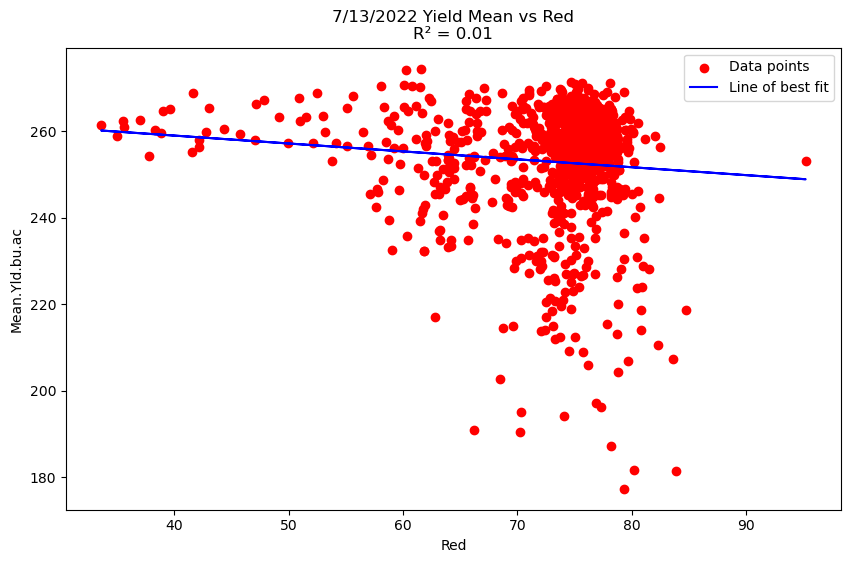

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X_red, y_yld_mean, color='red', label='Data points')
plt.plot(X_red, reg_red.predict(X_red), color='blue', label='Line of best fit')
plt.xlabel('Red')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs Red\nR² = {r2_red:.2f}')
plt.legend()
plt.savefig('red_vs_d_yld_mean_7_13_2022.pdf')
plt.show()

In [7]:
X_gre = green_mean_cols['Green'].values.reshape(-1, 1)
y_yld_mean = green_mean_cols['Mean.Yld.bu.ac']

reg_gre = LinearRegression()
reg_gre.fit(X_gre, y_yld_mean)

LinearRegression()

In [8]:
r2_gre = reg_gre.score(X_gre, y_yld_mean)
r2_gre

0.00045034060178150703

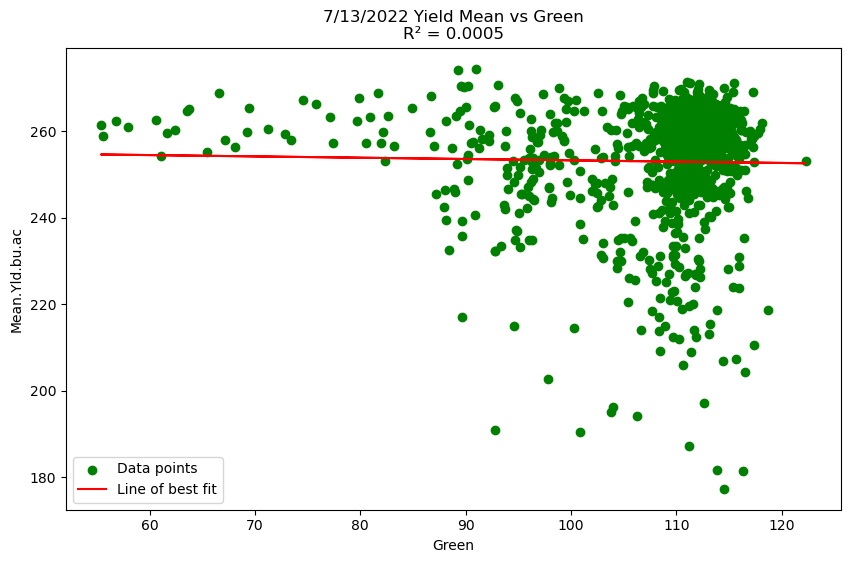

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X_gre, y_yld_mean, color='green', label='Data points')
plt.plot(X_gre, reg_gre.predict(X_gre), color='red', label='Line of best fit')
plt.xlabel('Green')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs Green\nR² = {r2_gre:.4f}')
plt.legend()
plt.savefig('green_vs_d_yld_mean_7_13_2022.pdf')
plt.show()

In [10]:
X_blu = blue_mean_cols['Blue'].values.reshape(-1, 1)
y_yld_mean = blue_mean_cols['Mean.Yld.bu.ac']

reg_blu = LinearRegression()
reg_blu.fit(X_blu, y_yld_mean)

LinearRegression()

In [11]:
r2_blu = reg_blu.score(X_blu, y_yld_mean)
r2_blu

0.0012766969081511315

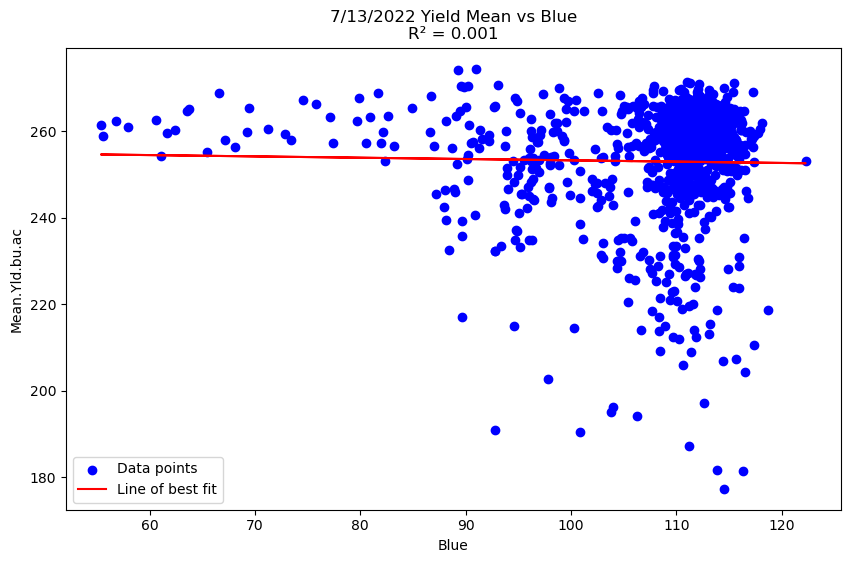

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_gre, y_yld_mean, color='blue', label='Data points')
plt.plot(X_gre, reg_gre.predict(X_gre), color='red', label='Line of best fit')
plt.xlabel('Blue')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs Blue\nR² = {r2_blu:.3f}')
plt.legend()
plt.savefig('blu_vs_d_yld_mean_7_13_2022.pdf')
plt.show()

In [13]:
X_bi = bi_mean_cols['BI'].values.reshape(-1, 1)
y_yld_mean = bi_mean_cols['Mean.Yld.bu.ac']

reg_bi = LinearRegression()
reg_bi.fit(X_bi, y_yld_mean)

LinearRegression()

In [14]:
r2_bi = reg_bi.score(X_bi, y_yld_mean)
r2_bi

0.002029828534994005

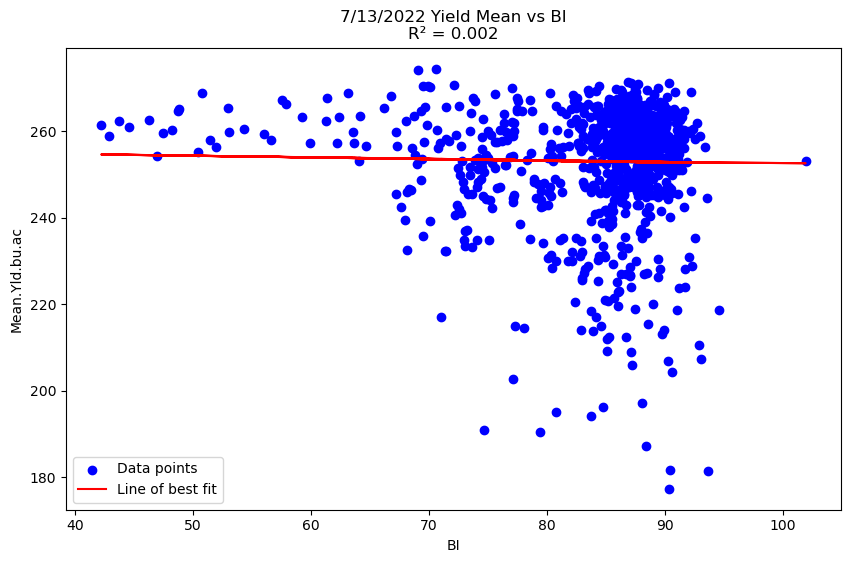

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_bi, y_yld_mean, color='blue', label='Data points')
plt.plot(X_bi, reg_gre.predict(X_gre), color='red', label='Line of best fit')
plt.xlabel('BI')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs BI\nR² = {r2_bi:.3f}')
plt.legend()
plt.savefig('bi_vs_d_yld_mean_7_13_2022.pdf')
plt.show()

In [16]:
X_gli = gli_mean_cols['GLI'].values.reshape(-1, 1)
y_yld_mean_gli = gli_mean_cols['Mean.Yld.bu.ac']

reg_gli = LinearRegression()
reg_gli.fit(X_gli, y_yld_mean_gli)

LinearRegression()

In [17]:
r2_gli = reg_gli.score(X_gli, y_yld_mean_gli)
r2_gli

0.06896971107949268

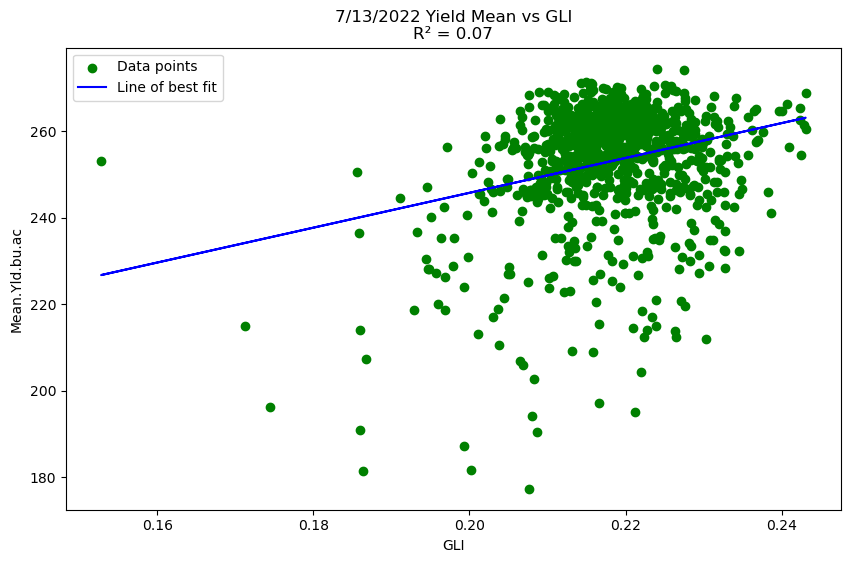

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X_gli, y_yld_mean_gli, color='green', label='Data points')
plt.plot(X_gli, reg_gli.predict(X_gli), color='blue', label='Line of best fit')
plt.xlabel('GLI')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs GLI\nR² = {r2_gli:.2f}')
plt.legend()
plt.savefig('gli_vs_d_yld_mean_7_13_2022.pdf')
plt.show()

In [19]:
X_ngrdi = ngrdi_mean_cols['NGRDI'].values.reshape(-1, 1)
y_yld_mean_ngrdi = ngrdi_mean_cols['Mean.Yld.bu.ac']

reg_ngrdi = LinearRegression()
reg_ngrdi.fit(X_ngrdi, y_yld_mean_ngrdi)

LinearRegression()

In [20]:
r2_ngrdi = reg_ngrdi.score(X_ngrdi, y_yld_mean_ngrdi)
r2_ngrdi

0.15374221399574273

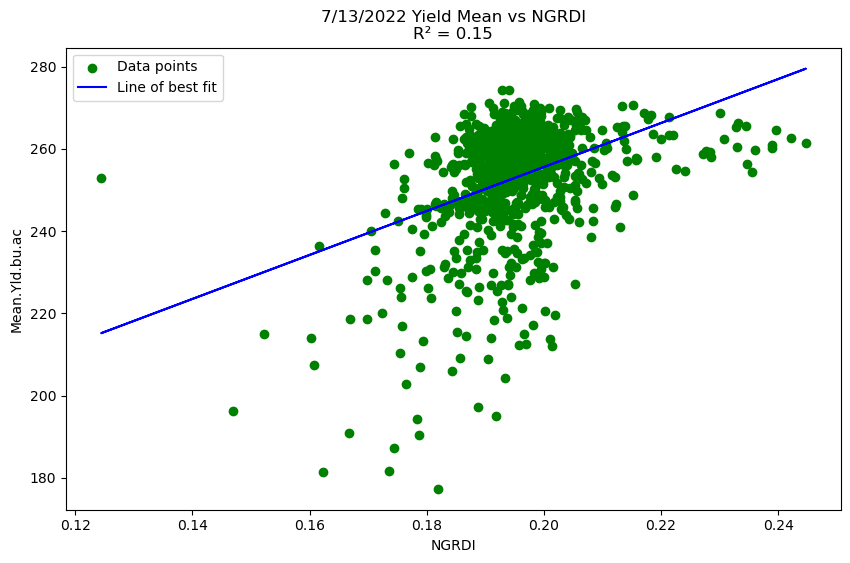

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_ngrdi, y_yld_mean_ngrdi, color='green', label='Data points')
plt.plot(X_ngrdi, reg_ngrdi.predict(X_ngrdi), color='blue', label='Line of best fit')
plt.xlabel('NGRDI')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs NGRDI\nR² = {r2_ngrdi:.2f}')
plt.legend()
plt.savefig('ngrdi_vs_d_yld_mean_7_13_2022.pdf')
plt.show()

In [22]:
X_vari = vari_mean_cols['VARI'].values.reshape(-1, 1)
y_yld_mean_vari = vari_mean_cols['Mean.Yld.bu.ac']

reg_vari = LinearRegression()
reg_vari.fit(X_vari, y_yld_mean_vari)

LinearRegression()

In [23]:
r2_vari = reg_vari.score(X_vari, y_yld_mean_vari)
r2_vari

0.16510554813284684

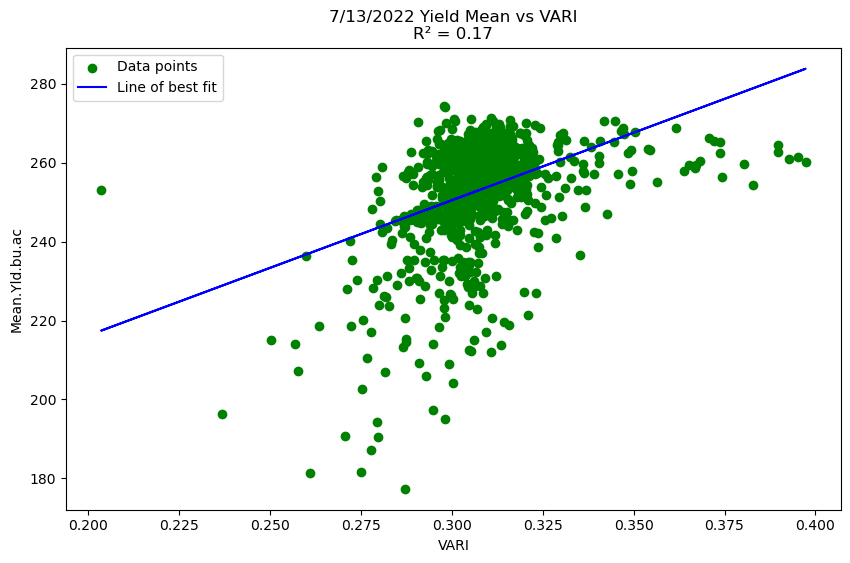

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_vari, y_yld_mean_vari, color='green', label='Data points')
plt.plot(X_vari, reg_vari.predict(X_vari), color='blue', label='Line of best fit')
plt.xlabel('VARI')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs VARI\nR² = {r2_vari:.2f}')
plt.legend()
plt.savefig('vari_vs_d_yld_mean_7_13_2022.pdf')
plt.show()

In [25]:
X_bgi = bgi_mean_cols['BGI'].values.reshape(-1, 1)
y_yld_mean_bgi = bgi_mean_cols['Mean.Yld.bu.ac']

reg_bgi = LinearRegression()
reg_bgi.fit(X_bgi, y_yld_mean_bgi)

LinearRegression()

In [26]:
r2_bgi = reg_bgi.score(X_bgi, y_yld_mean_bgi)
r2_bgi

0.003668125974593206

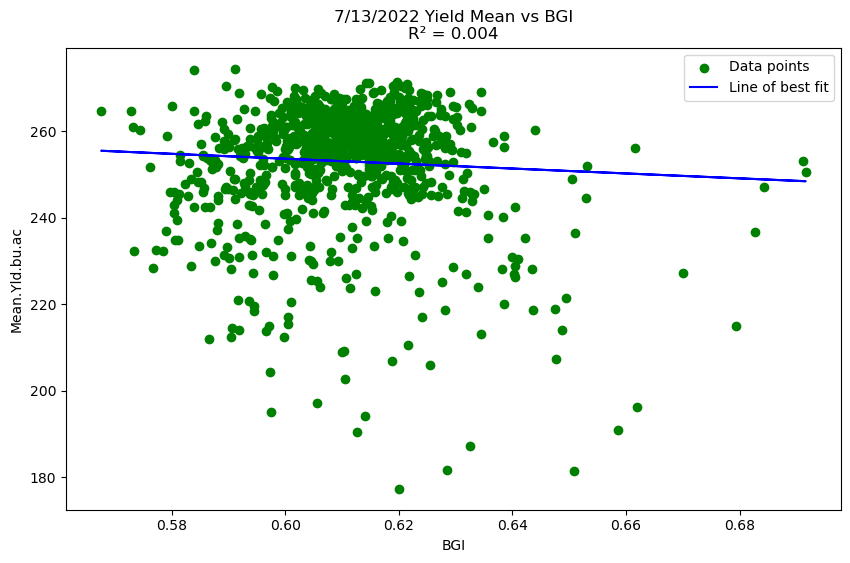

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_bgi, y_yld_mean_bgi, color='green', label='Data points')
plt.plot(X_bgi, reg_bgi.predict(X_bgi), color='blue', label='Line of best fit')
plt.xlabel('BGI')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs BGI\nR² = {r2_bgi:.3f}')
plt.legend()
plt.savefig('bgi_vs_d_yld_mean_7_13_2022.pdf')
plt.show()


In [28]:
X_exg = exg_mean_cols['ExG'].values.reshape(-1, 1)
y_yld_mean_exg = exg_mean_cols['Mean.Yld.bu.ac']

reg_exg = LinearRegression()
reg_exg.fit(X_exg, y_yld_mean_exg)

LinearRegression()

In [29]:
r2_exg = reg_exg.score(X_exg, y_yld_mean_exg)
r2_exg

0.0070577597307660556

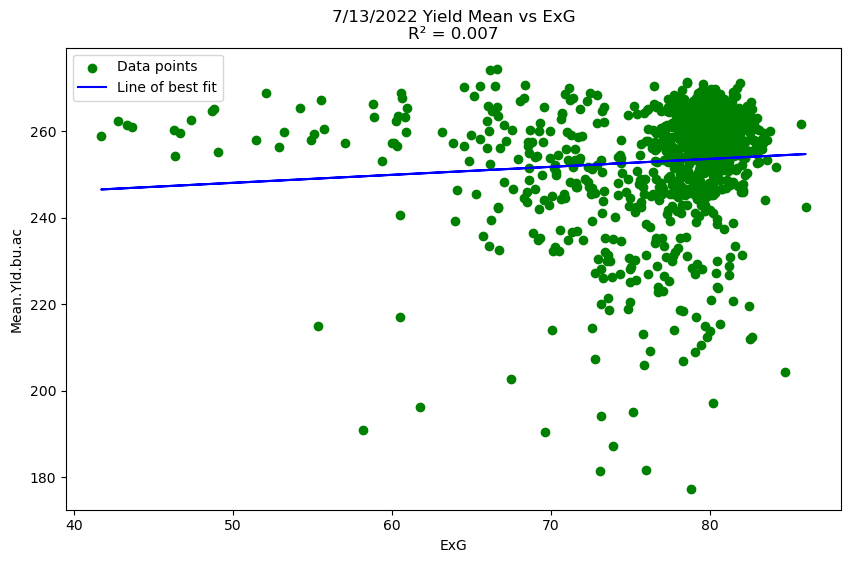

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X_exg, y_yld_mean_exg, color='green', label='Data points')
plt.plot(X_exg, reg_exg.predict(X_exg), color='blue', label='Line of best fit')
plt.xlabel('ExG')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs ExG\nR² = {r2_exg:.3f}')
plt.legend()
plt.savefig('exg_vs_d_yld_mean_7_13_2022.pdf')

plt.show()

In [31]:
X_exr = exr_mean_cols['ExR'].values.reshape(-1, 1)
y_yld_mean_exr = exr_mean_cols['Mean.Yld.bu.ac']

reg_exr = LinearRegression()
reg_exr.fit(X_exr, y_yld_mean_exr)

LinearRegression()

In [32]:
r2_exr = reg_exr.score(X_exr, y_yld_mean_exr)
r2_exr

0.15228628442354686

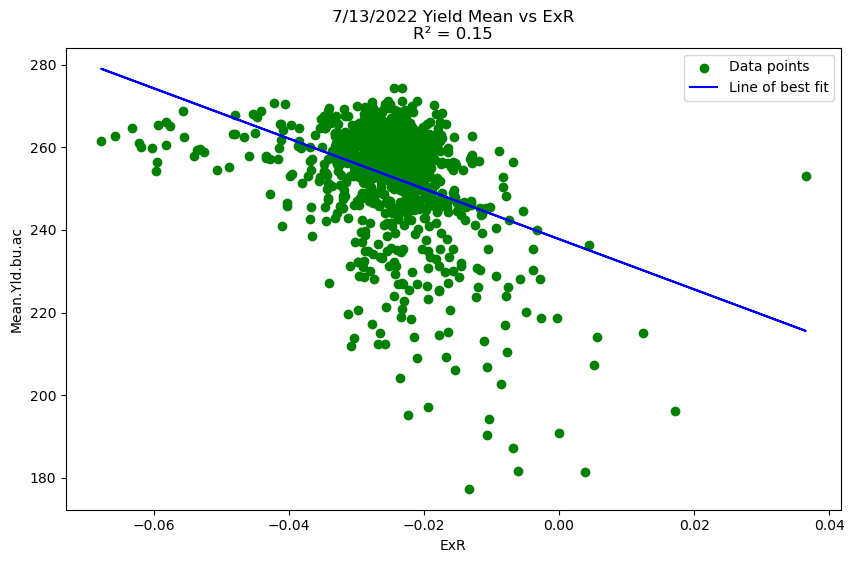

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(X_exr, y_yld_mean_exr, color='green', label='Data points')
plt.plot(X_exr, reg_exr.predict(X_exr), color='blue', label='Line of best fit')
plt.xlabel('ExR')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs ExR\nR² = {r2_exr:.2f}')
plt.legend()
plt.savefig('exr_vs_d_yld_mean_7_13_2022.pdf')

plt.show()

In [34]:
X_exb = exb_mean_cols['ExB'].values.reshape(-1, 1)
y_yld_mean_exb = exb_mean_cols['Mean.Yld.bu.ac']

reg_exb = LinearRegression()
reg_exb.fit(X_exb, y_yld_mean_exb)

LinearRegression()

In [35]:
r2_exb = reg_exb.score(X_exb, y_yld_mean_exb)
r2_exb

0.004799792459974084

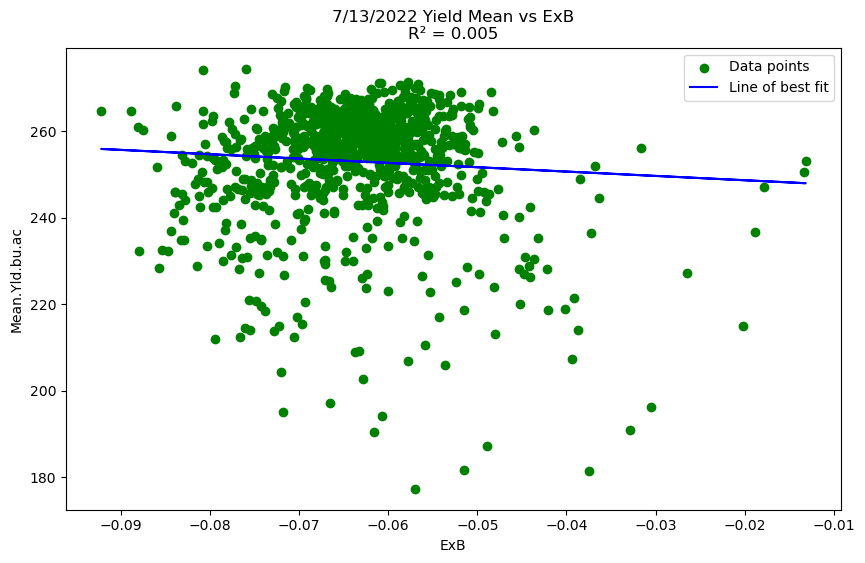

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X_exb, y_yld_mean_exb, color='green', label='Data points')
plt.plot(X_exb, reg_exb.predict(X_exb), color='blue', label='Line of best fit')
plt.xlabel('ExB')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs ExB\nR² = {r2_exb:.3f}')
plt.legend()
plt.savefig('exb_vs_d_yld_mean_7_13_2022.pdf')

plt.show()

In [37]:
X_exgr = exgr_mean_cols['ExGR'].values.reshape(-1, 1)
y_yld_mean_exgr = exgr_mean_cols['Mean.Yld.bu.ac']

reg_exgr = LinearRegression()
reg_exgr.fit(X_exgr, y_yld_mean_exgr)

LinearRegression()

In [38]:
r2_exgr = reg_exgr.score(X_exgr, y_yld_mean_exgr)
r2_exgr

0.007157963905577103

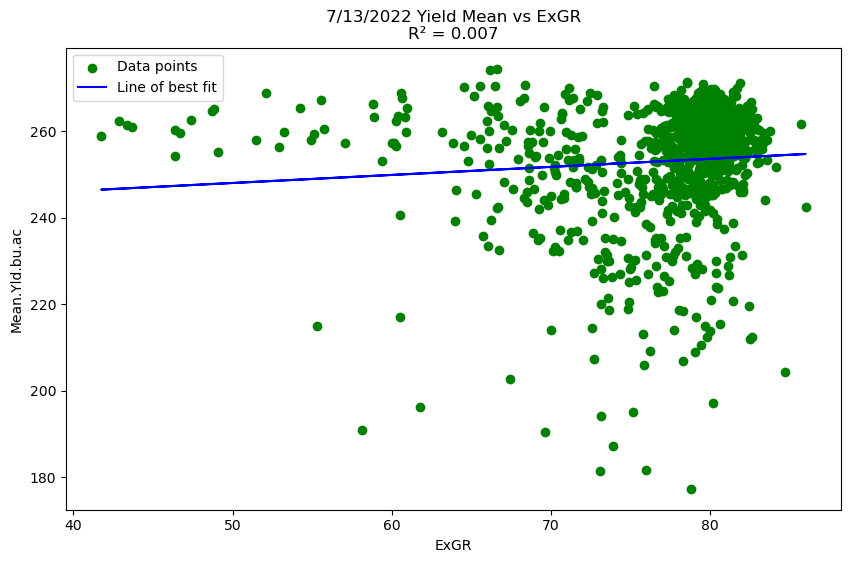

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(X_exgr, y_yld_mean_exgr, color='green', label='Data points')
plt.plot(X_exgr, reg_exgr.predict(X_exgr), color='blue', label='Line of best fit')
plt.xlabel('ExGR')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs ExGR\nR² = {r2_exgr:.3f}')
plt.legend()
plt.savefig('exgr_vs_d_yld_mean_7_13_2022.pdf')

plt.show()


In [40]:
X_mgrvi = mgrvi_mean_cols['MGRVI'].values.reshape(-1, 1)
y_yld_mean_mgrvi = mgrvi_mean_cols['Mean.Yld.bu.ac']

reg_mgrvi = LinearRegression()
reg_mgrvi.fit(X_mgrvi, y_yld_mean_mgrvi)

LinearRegression()

In [41]:
r2_mgrvi = reg_mgrvi.score(X_mgrvi, y_yld_mean_mgrvi)
r2_mgrvi

0.1562651702415807

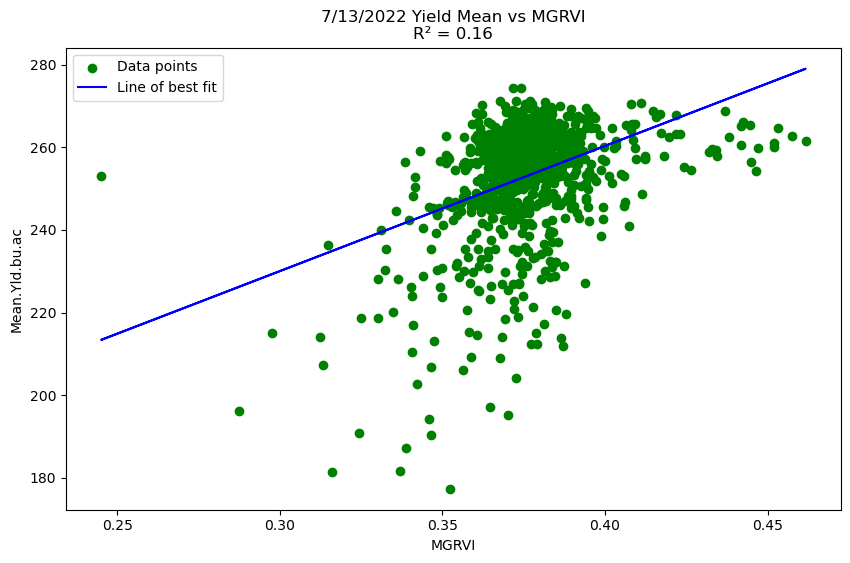

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(X_mgrvi, y_yld_mean_mgrvi, color='green', label='Data points')
plt.plot(X_mgrvi, reg_mgrvi.predict(X_mgrvi), color='blue', label='Line of best fit')
plt.xlabel('MGRVI')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs MGRVI\nR² = {r2_mgrvi:.2f}')
plt.legend()
plt.savefig('mgrvi_vs_d_yld_mean_7_13_2022.pdf')
plt.show()

In [43]:
X_rgbvi = rgbvi_mean_cols['RGBVI'].values.reshape(-1, 1)
y_yld_mean_rgbvi = rgbvi_mean_cols['Mean.Yld.bu.ac']

reg_rgbvi = LinearRegression()
reg_rgbvi.fit(X_rgbvi, y_yld_mean_rgbvi)

LinearRegression()

In [44]:
r2_rgbvi = reg_rgbvi.score(X_rgbvi, y_yld_mean_rgbvi)
r2_rgbvi

0.06487202546547233

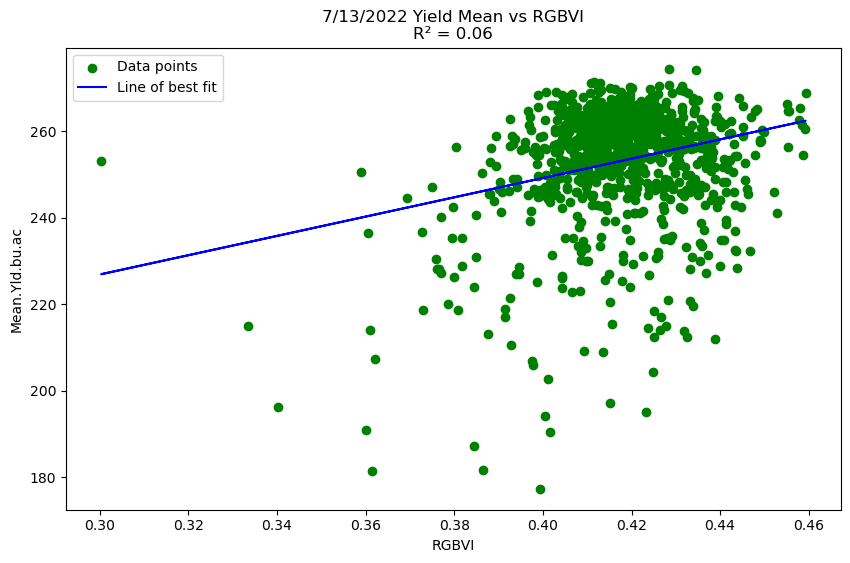

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(X_rgbvi, y_yld_mean_rgbvi, color='green', label='Data points')
plt.plot(X_rgbvi, reg_rgbvi.predict(X_rgbvi), color='blue', label='Line of best fit')
plt.xlabel('RGBVI')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs RGBVI\nR² = {r2_rgbvi:.2f}')
plt.legend()
plt.savefig('rgbvi_vs_d_yld_mean_7_13_2022.pdf')

plt.show()

In [46]:
X_grri = grri_mean_cols['GRRI'].values.reshape(-1, 1)
y_yld_mean_grri = grri_mean_cols['Mean.Yld.bu.ac']

reg_grri = LinearRegression()
reg_grri.fit(X_grri, y_yld_mean_grri)

LinearRegression()

In [149]:
r2_grri = reg_grri.score(X_grri, y_yld_mean_grri)
r2_grri

0.14814207076553754

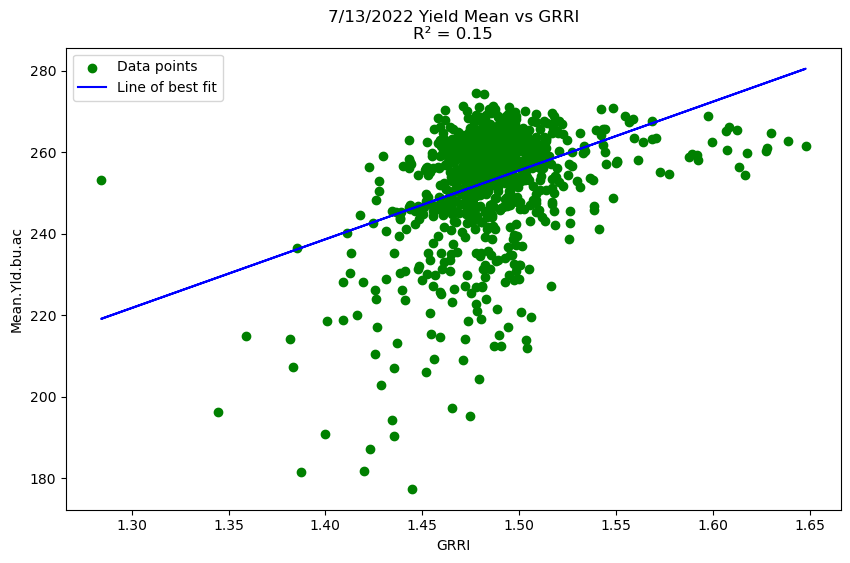

In [150]:
plt.figure(figsize=(10, 6))
plt.scatter(X_grri, y_yld_mean_grri, color='green', label='Data points')
plt.plot(X_grri, reg_grri.predict(X_grri), color='blue', label='Line of best fit')
plt.xlabel('GRRI')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs GRRI\nR² = {r2_grri:.2f}')
plt.legend()
plt.savefig('grri_vs_d_yld_mean_7_13_2022.pdf')

plt.show()

In [151]:
X_veg = veg_mean_cols['VEG'].values.reshape(-1, 1)
y_yld_mean_veg = veg_mean_cols['Mean.Yld.bu.ac']

reg_veg = LinearRegression()
reg_veg.fit(X_veg, y_yld_mean_veg)

LinearRegression()

In [152]:
r2_veg = reg_veg.score(X_veg, y_yld_mean_veg)
r2_veg

0.0962691109047481

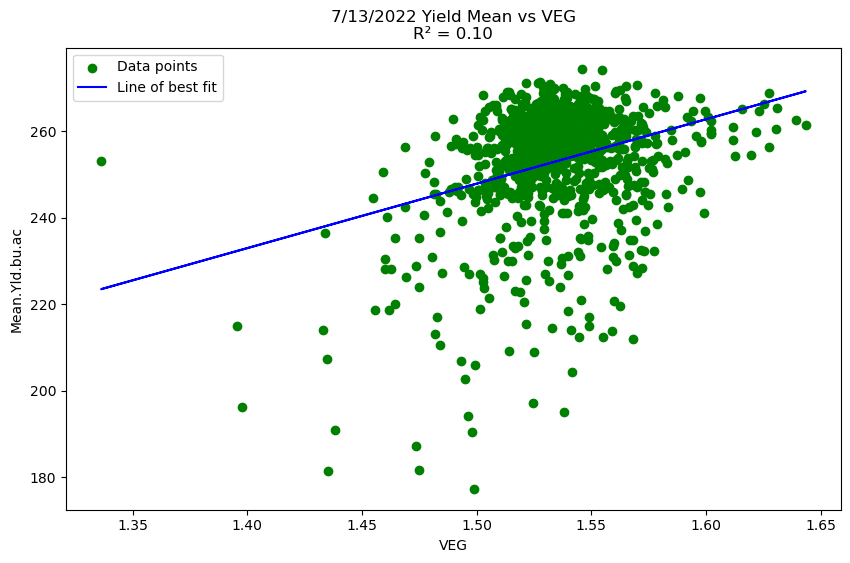

In [153]:
plt.figure(figsize=(10, 6))
plt.scatter(X_veg, y_yld_mean_veg, color='green', label='Data points')
plt.plot(X_veg, reg_veg.predict(X_veg), color='blue', label='Line of best fit')
plt.xlabel('VEG')
plt.ylabel('Mean.Yld.bu.ac')
plt.title(f'7/13/2022 Yield Mean vs VEG\nR² = {r2_veg:.2f}')
plt.legend()
plt.savefig('veg_vs_d_yld_mean_7_13_2022.pdf')

plt.show()